### <u> Alumno:</u> Tolaba Lisandro Moises - LU: INF7658

# <u>PDI – Color: Actividad práctica</u>

### Podríamos llamar a al coeficiente de luminancia (si es menor que uno, baja la luminancia, y viceversa), y b al coeficiente de saturación (si es menor que uno baja la saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:

### 1.Normalizar los valores de RGB del pixel
### 2.RGB -> YIQ (utilizando la segunda matriz)
### 3.Y’ := aY ;
### 4.I’ := bI ; Q’ := bQ ;
### 5.Chequear que Y’ <= 1 (para que no se vaya de rango)
### 6.Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
### 7.Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
### 8.Convertir R’G’B’ a bytes y graficar el pixel

In [11]:
import imageio
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

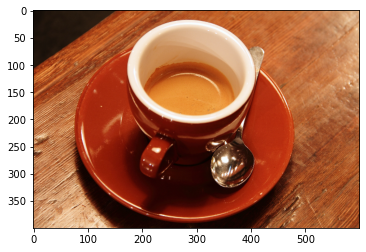

In [13]:
# Cargar la imagen
imagen_rgb = imageio.imread('imageio:coffee.png')/255 # Se divide por 255 para normalizar los valores de RGB del pixel 

# Mostrar la imagen
plt.imshow(imagen_rgb)
plt.show()

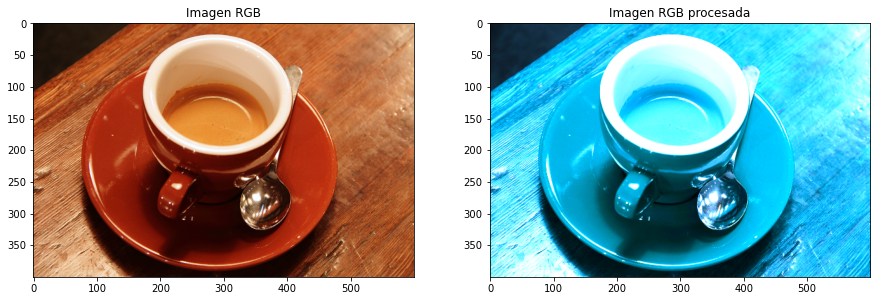

In [15]:
# Declaro las matrices de cambio de espacio cromático

# Matiz de YIQ a RGB
YIQ2RGB = np.array([
    [1, 0.9663, 0.6210],
    [1, -0.2721, -0.6474],
    [1, -1.1070, 1.7046]
])

# MAtriz de RGB a YIQ
RGB2YIQ = np.array([
    [0.299, 0.587, 0.114], 
    [0.595716, -0.274453, -0.321263], 
    [0.211456, -0.522591, 0.311135]
])

imagen_yiq = apply_matrix(imagen_rgb, RGB2YIQ)# Convierto de RGB a YIQ


alpha = 1.5 # Valores cercado a 0 para imagen mas "oscura". Cercanos a 1 para imagen mas "clara"
beta  = -2 # beta = 0, no hay color, la imagen se ve en blanco y negro
          

inter = np.array([
    [alpha, 0, 0],
    [0, beta, 0],
    [0, 0, beta]
])

imagen_yiq = apply_matrix(imagen_yiq, inter)# Modifico los valores de YIQ

imagen_rgb_out = apply_matrix(imagen_yiq, YIQ2RGB) # Cambio de espacio cromático. YIQ-->RGB
imagen_rgb_out = np.clip(imagen_rgb_out, 0, 1) # Clamping para valores dentro de [0, 1]

# Muestro la imagen original y la procesada
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(imagen_rgb)
axes[0].set_title('Imagen RGB')
axes[1].imshow(imagen_rgb_out)
axes[1].set_title('Imagen RGB procesada')
plt.show()